# Working with Pandas

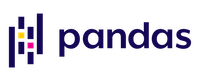

Pandas is a powerful library for working with data. Pandas provides fast and easy functions for reading data from files, and analyzing it.

Pandas is based on another library called `numpy` - which is widely used in scientific computing. Pandas extends `numpy` and provides new data types such as **Index**, **Series** and **DataFrames**.

Pandas implementation is very fast and efficient - so compared to other methods of data processing - using `pandas` results is simpler code and quick processing. We will now re-implement our code for reading a file and computing distance using Pandas.

By convention, `pandas` is commonly imported as `pd`

In [1]:
import pandas as pd

## Reading Files

In [2]:
import os
data_pkg_path = 'data'
filename = 'worldcities.csv'
path = os.path.join(data_pkg_path, filename)

A **DataFrame** is the most used Pandas object. You can think of a DataFrame being equivalent to a Spreadsheet or an Attribute Table of a GIS layer. 

Pandas provide easy methods to directly read files into a DataFrame. You can use methods such as `read_csv()`, `read_excel()`, `read_hdf()` and so forth to read a variety of formats. Here we will read the `worldcitites.csv` file using `read_csv()` method.

In [3]:
df = pd.read_csv(path)

In [4]:
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


Once the file is read and a DataFrame object is created, we can inspect it using the `head()` method. 

In [5]:
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


There is also a `info()` method that shows basic information about the dataframe, such as number of rows/columns and data types of each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        15493 non-null  object 
 1   city_ascii  15493 non-null  object 
 2   lat         15493 non-null  float64
 3   lng         15493 non-null  float64
 4   country     15493 non-null  object 
 5   iso2        15462 non-null  object 
 6   iso3        15493 non-null  object 
 7   admin_name  15302 non-null  object 
 8   capital     5246 non-null   object 
 9   population  13808 non-null  float64
 10  id          15493 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


Another useful method is `describe()` that shows summary statistics which explain the `distribution` of our data.

In [7]:
df.describe()

,lat,lng,population,id
count,15493.000000,15493.000000,1.380800e+04,1.549300e+04
mean,29.633315,-29.834189,1.812480e+05,1.623208e+09
std,22.414727,76.340457,7.947989e+05,2.826451e+08
min,-54.933300,-179.590000,0.000000e+00,1.004003e+09
25%,22.305000,-86.324200,9.167500e+03,1.404601e+09
50%,37.756200,-71.916700,2.349650e+04,1.826644e+09
75%,42.444200,25.582100,9.030625e+04,1.840015e+09
max,82.483300,179.383300,3.567600e+07,1.934000e+09


## Filtering Data

Pandas have many ways of selecting and filtered data from a dataframe. We will now see how to use the [Boolean Filtering](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) to filter the dataframe to rows that match a condition.

In [8]:
home_country = 'Poland'

poland_filtered = df[df['country'] == home_country]
poland_filtered

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
138,Katowice,Katowice,50.2604,19.0200,Poland,PL,POL,Śląskie,admin,2746000.0,1616798495
254,Warsaw,Warsaw,52.2500,21.0000,Poland,PL,POL,Mazowieckie,primary,1707000.0,1616024847
791,Łódź,Lodz,51.7750,19.4514,Poland,PL,POL,Łódzkie,admin,758000.0,1616832750
792,Kraków,Krakow,50.0600,19.9600,Poland,PL,POL,Małopolskie,admin,756000.0,1616172264
809,Gdańsk,Gdansk,54.3600,18.6400,Poland,PL,POL,Pomorskie,admin,740000.0,1616406372
862,Bytom,Bytom,50.3500,18.9100,Poland,PL,POL,Śląskie,minor,662247.0,1616740907
884,Wrocław,Wroclaw,51.1104,17.0300,Poland,PL,POL,Dolnośląskie,admin,634893.0,1616108520
892,Poznań,Poznan,52.4058,16.8999,Poland,PL,POL,Wielkopolskie,admin,623997.0,1616725607
1031,Gliwice,Gliwice,50.3304,18.6700,Poland,PL,POL,Śląskie,minor,507670.0,1616311376
1220,Szczecin,Szczecin,53.4204,14.5300,Poland,PL,POL,Zachodniopomorskie,admin,407811.0,1616256546


In [9]:
poland_500 = poland_filtered[poland_filtered['population'] > 500000]
poland_500

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
138,Katowice,Katowice,50.2604,19.0200,Poland,PL,POL,Śląskie,admin,2746000.0,1616798495
254,Warsaw,Warsaw,52.2500,21.0000,Poland,PL,POL,Mazowieckie,primary,1707000.0,1616024847
791,Łódź,Lodz,51.7750,19.4514,Poland,PL,POL,Łódzkie,admin,758000.0,1616832750
792,Kraków,Krakow,50.0600,19.9600,Poland,PL,POL,Małopolskie,admin,756000.0,1616172264
809,Gdańsk,Gdansk,54.3600,18.6400,Poland,PL,POL,Pomorskie,admin,740000.0,1616406372
862,Bytom,Bytom,50.3500,18.9100,Poland,PL,POL,Śląskie,minor,662247.0,1616740907
884,Wrocław,Wroclaw,51.1104,17.0300,Poland,PL,POL,Dolnośląskie,admin,634893.0,1616108520
892,Poznań,Poznan,52.4058,16.8999,Poland,PL,POL,Wielkopolskie,admin,623997.0,1616725607
1031,Gliwice,Gliwice,50.3304,18.6700,Poland,PL,POL,Śląskie,minor,507670.0,1616311376


Hmmm, apparently Katowice is the most populous city in Poland! Not sure that is correcrAn example of how important cleaning data is, and how difficult that can be without domain knowledge.

Filtered dataframe is a just view of the original data and we cannot make changes to it. We can save the filtered view to a new dataframe using the `copy()` method.

In [10]:
country_df = df[df['country'] == home_country].copy()
country_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
138,Katowice,Katowice,50.2604,19.0200,Poland,PL,POL,Śląskie,admin,2746000.0,1616798495
254,Warsaw,Warsaw,52.2500,21.0000,Poland,PL,POL,Mazowieckie,primary,1707000.0,1616024847
791,Łódź,Lodz,51.7750,19.4514,Poland,PL,POL,Łódzkie,admin,758000.0,1616832750
792,Kraków,Krakow,50.0600,19.9600,Poland,PL,POL,Małopolskie,admin,756000.0,1616172264
809,Gdańsk,Gdansk,54.3600,18.6400,Poland,PL,POL,Pomorskie,admin,740000.0,1616406372
862,Bytom,Bytom,50.3500,18.9100,Poland,PL,POL,Śląskie,minor,662247.0,1616740907
884,Wrocław,Wroclaw,51.1104,17.0300,Poland,PL,POL,Dolnośląskie,admin,634893.0,1616108520
892,Poznań,Poznan,52.4058,16.8999,Poland,PL,POL,Wielkopolskie,admin,623997.0,1616725607
1031,Gliwice,Gliwice,50.3304,18.6700,Poland,PL,POL,Śląskie,minor,507670.0,1616311376
1220,Szczecin,Szczecin,53.4204,14.5300,Poland,PL,POL,Zachodniopomorskie,admin,407811.0,1616256546


# iloc[ ]

To locate a particular row or column from a dataframe, Pandas providea `loc[]` and `iloc[]` methods - that allows you to *locate* particular slices of data. Learn about [different indexing methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#different-choices-for-indexing) in Pandas. Here we can use `iloc[]` to find the row matching the `home_city` name. Since `iloc[]` uses index, the *0* here refers to the first row.

In [11]:
home_city = 'Krakow'

city_df = country_df[country_df['city_ascii'] == home_city]
city_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
792,Kraków,Krakow,50.06,19.96,Poland,PL,POL,Małopolskie,admin,756000.0,1616172264


Now that we have filtered down the data to a single row, we can select individual column values using column names :

In [12]:
home_city_coordinates = (city_df.iloc[0]['lat'], city_df.iloc[0]['lng']) # row referred to by index, column referred to by name
home_city_coordinates

(50.06, 19.96)

## Performing calculations

Let's learn how to do calculations on a dataframe. We can iterate over each row and perform some calculations. But pandas provide a much more efficient way. You can use the `apply()` method to run a function on each row. This is fast and makes it easy to perform complex computations on large datasets.

The `apply()` function takes 2 arguments. A function to apply, and the axis along which to apply it. `axis=0` means it will be applied to `columns` and `axis=1` means it will apply to `rows`.

In [13]:
from geopy import distance

def calculate_distance(row):
    
    city_coordinates = (row['lat'], row['lng'])
    return distance.geodesic(city_coordinates, home_city_coordinates).km

result = country_df.apply(calculate_distance, axis=1) # axis=1 means function applied to rows. To apply across columns set axis=0
print(result)

138      70.771343
254     254.265858
791     194.110124
792       0.000000
809     486.876002
862      81.605076
884     238.118529
892     337.266322
1031     96.897194
1220    529.313664
1327    366.300849
1342    227.293077
1505    505.792067
1594    409.394948
1812    146.061422
1996    104.888174
2203    417.665740
2786    160.187118
2841    461.121690
2939    377.023048
3128    528.111816
3226    389.606064
3495    325.121308
3821    450.832125
5629    344.154013
5665    443.798327
dtype: float64


We can add these results to the dataframe by simply `assigning` the result to a new column.

In [14]:
country_df['distance_from_krakow_km'] = result
country_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,distance_from_krakow_km
138,Katowice,Katowice,50.2604,19.0200,Poland,PL,POL,Śląskie,admin,2746000.0,1616798495,70.771343
254,Warsaw,Warsaw,52.2500,21.0000,Poland,PL,POL,Mazowieckie,primary,1707000.0,1616024847,254.265858
791,Łódź,Lodz,51.7750,19.4514,Poland,PL,POL,Łódzkie,admin,758000.0,1616832750,194.110124
792,Kraków,Krakow,50.0600,19.9600,Poland,PL,POL,Małopolskie,admin,756000.0,1616172264,0.000000
809,Gdańsk,Gdansk,54.3600,18.6400,Poland,PL,POL,Pomorskie,admin,740000.0,1616406372,486.876002
862,Bytom,Bytom,50.3500,18.9100,Poland,PL,POL,Śląskie,minor,662247.0,1616740907,81.605076
884,Wrocław,Wroclaw,51.1104,17.0300,Poland,PL,POL,Dolnośląskie,admin,634893.0,1616108520,238.118529
892,Poznań,Poznan,52.4058,16.8999,Poland,PL,POL,Wielkopolskie,admin,623997.0,1616725607,337.266322
1031,Gliwice,Gliwice,50.3304,18.6700,Poland,PL,POL,Śląskie,minor,507670.0,1616311376,96.897194
1220,Szczecin,Szczecin,53.4204,14.5300,Poland,PL,POL,Zachodniopomorskie,admin,407811.0,1616256546,529.313664


We are done with our analysis and ready to save the results. We can further filter the results to only certain columns.

In [15]:
filtered = country_df[['city_ascii','distance_from_krakow_km']]
filtered

,city_ascii,distance_from_krakow_km
138,Katowice,70.771343
254,Warsaw,254.265858
791,Lodz,194.110124
792,Krakow,0.000000
809,Gdansk,486.876002
862,Bytom,81.605076
884,Wroclaw,238.118529
892,Poznan,337.266322
1031,Gliwice,96.897194
1220,Szczecin,529.313664


Let's rename the `city_ascii` column to give it a more readable name :

In [16]:
filtered = filtered.rename(columns = {'city_ascii': 'city'})
filtered

,city,distance_from_krakow_km
138,Katowice,70.771343
254,Warsaw,254.265858
791,Lodz,194.110124
792,Krakow,0.000000
809,Gdansk,486.876002
862,Bytom,81.605076
884,Wroclaw,238.118529
892,Poznan,337.266322
1031,Gliwice,96.897194
1220,Szczecin,529.313664


Now that we have added filtered the original data and computed the distance for all cities, we can save the resulting dataframe to a file. Similar to read methods, Pandas have several write methods, such as `to_csv()`, `to_excel()` etc.

Here we will use the `to_csv()` method to write a CSV file. Pandas assigns an index column (unique integer values) to a dataframe by default. We specify `index=False` so that this index is not added to our output.

In [17]:
output_filename = 'cities_distance_pandas.csv'
output_dir = 'output'
output_path = os.path.join(output_dir, output_filename)
filtered.to_csv(output_path, index=False)
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output/cities_distance_pandas.csv


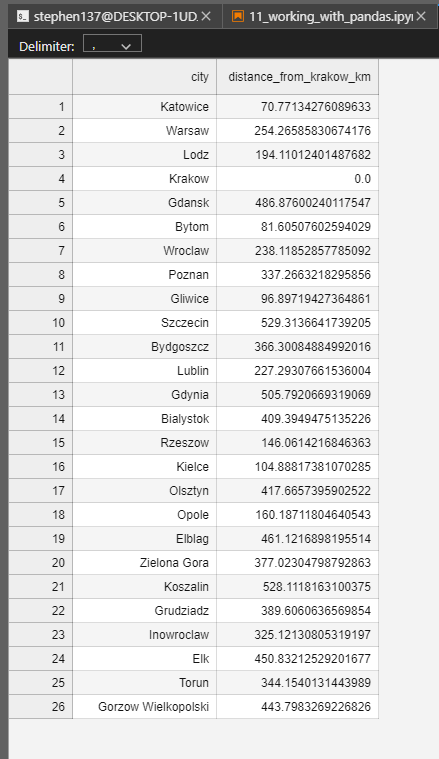

## Exercise

You will notice that the output file contains a row with the `home_city` as well. Modify the `filtered` dataframe to remove this row and write the results to a file.

Hint: Use the Boolean filtering method we learnt earlier to select rows that do not match the `home_city`.

In [ ]:
import os
from geopy import distance
import pandas as pd

def calculate_distance(row):
    city_coordinates = (row['lat'], row['lng'])
    return distance.geodesic(city_coordinates, home_city_coordinates).km

data_pkg_path = 'data'
filename = 'worldcities.csv'
path = os.path.join(data_pkg_path, filename)
df = pd.read_csv(path)

home_country = 'India'
home_city = 'Bengaluru'

country_df = df[df['country'] == home_country].copy()
filtered = country_df[country_df['city_ascii'] == home_city]
home_city_coordinates = (filtered.iloc[0]['lat'], filtered.iloc[0]['lng'])

country_df['distance'] = country_df.apply(calculate_distance, axis=1)
filtered = country_df[['city_ascii','distance']]
filtered = filtered.rename(columns = {'city_ascii': 'city'})
filtered

## My Solution

In [20]:
import os
from geopy import distance
import pandas as pd

# custom function to calc distance between 
def calculate_distance(row):
    city_coordinates = (row['lat'], row['lng'])
    return distance.geodesic(city_coordinates, home_city_coordinates).km

# config file and path
data_pkg_path = 'data'
filename = 'worldcities.csv'
path = os.path.join(data_pkg_path, filename)

#  read the csv into a pandas DataFrame
df = pd.read_csv(path)

# instantiate origin country and city 
home_country = 'Poland'
home_city = 'Krakow'

# filter df for Polish cities
country_df = df[df['country'] == home_country].copy()

# further filter for Krakow
filtered = country_df[country_df['city_ascii'] == home_city]

# extract Krakow coords
home_city_coordinates = (filtered.iloc[0]['lat'], filtered.iloc[0]['lng'])

# add a new column named distance, and fill rows with values computed from function
country_df['distance'] = country_df.apply(calculate_distance, axis=1) # apply function across rows - to apply across columns set axis=0

# tidy up results - exclude origin city and restrict to 2 columns
filtered = country_df[country_df['city_ascii'] != home_city] # filter out Krakow
filtered = filtered[['city_ascii','distance']]
filtered = filtered.rename(columns = {'city_ascii': 'city'})

In [21]:
output_filename = 'krakow_distance_pandas.csv'
output_dir = 'output'
output_path = os.path.join(output_dir, output_filename)
filtered.to_csv(output_path, index=False)
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output/krakow_distance_pandas.csv


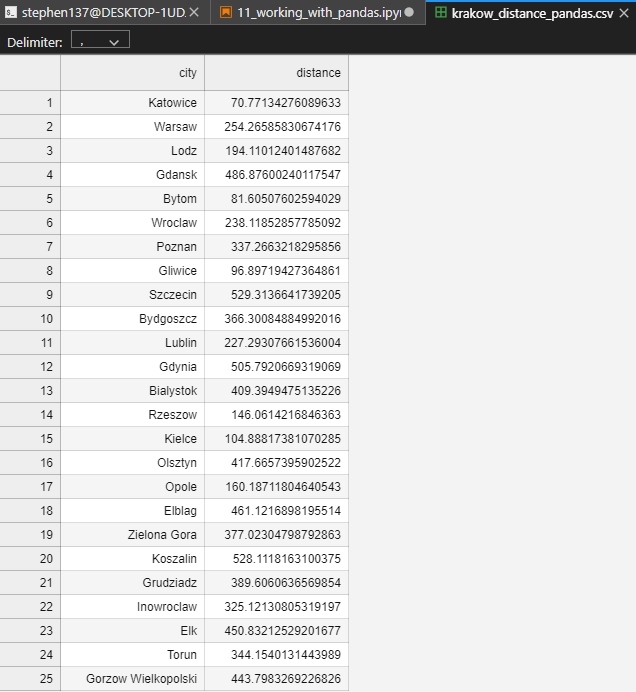